<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter1/Python_codes_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1.1

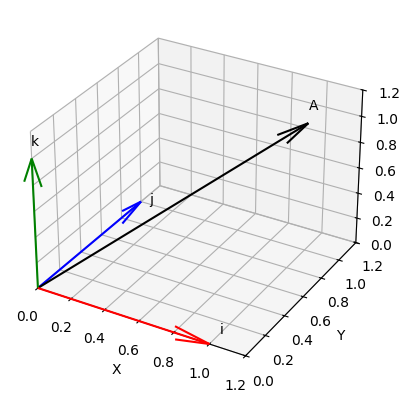

In [1]:
%reset -f

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')   # set up 3D plot

# plot  vector from (0,0,0) to (1,1,1) using quiver()
ax.quiver(0,0,0,1,1,1,color='k',length=1,arrow_length_ratio=.1)

# plot unit vectors i, j, k
ax.quiver(0,0,0,1,0,0,color='r',length=1,arrow_length_ratio=.2)
ax.quiver(0,0,0,0,1,0,color='b',length=1,arrow_length_ratio=.2)
ax.quiver(0,0,0,0,0,1,color='g',length=1,arrow_length_ratio=.2)

ax.set_xlabel('X')     # label,set limits on x,y,z axes
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,1.2);
ax.set_ylim(0,1.2);
ax.set_zlim(0,1.2);

ax.text(1,1,1.1,'A',color='black')   # add text A for vector
ax.text(1,0.1,0,'i',color='black')   # add text for vector i
ax.text(0.05,1,0,'j',color='black')  # add text for vector j
ax.text(0,0,1.1,'k',color='black')   # add text for vector k
plt.show()

# Example 1.2

In [2]:
%reset -f

from sympy.vector import CoordSys3D
from sympy import  symbols, diff, sin

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define symbols
a, b, c, t = symbols('a, b, c, t  ', real=True)

R = CoordSys3D('R')      # define coordinate system R with
                         # unit vectors R.i, R.j, R.k

# define position vector r
r = a*R.i + b*sin(a*t)*R.j +c*t**2*R.k

v = diff(r,t)                     # find v=dr/dt
print('velocity v = ', v)

a = diff(v,t)                     # find a=dv/dt
print('\nacceleration a = ', a)


---------------------------- CODE OUTPUT ----------------------------- 

velocity v =  (a*b*cos(a*t))*R.j + 2*c*t*R.k

acceleration a =  (-a**2*b*sin(a*t))*R.j + 2*c*R.k


# Example 1.3

In [3]:
%reset -f

from sympy import Symbol, symbols, Function, dsolve, diff

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define symbols and the function v
v = Function('v')
t = Symbol('t', real=True, positive=True)
a, v0 = symbols('a, v0', real=True)

# initial conditions for the ODE
initconds = {v(0):v0}

# use dsolve to obtain solution of ODE   dv/dt=a
solution = dsolve(diff(v(t),t)-a,v(t),ics=initconds).rhs

print('The solution is   v(t) = ',solution)

---------------------------- CODE OUTPUT ----------------------------- 

The solution is   v(t) =  a*t + v0


# Example 1.4

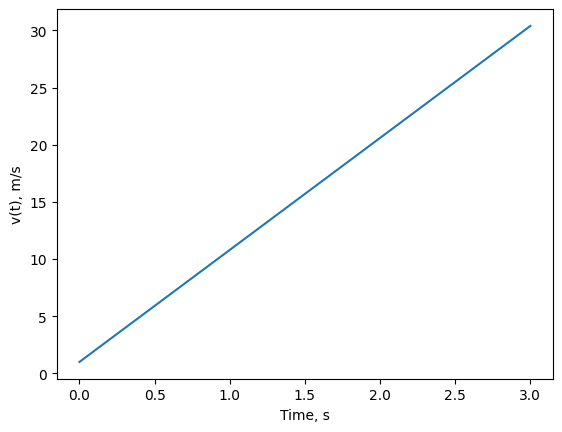

In [4]:
%reset -f

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# initial condition v(0)=1, and acceleration a =9.8 m/s^2
v0 = 1
a = 9.8

# define function velderiv to be called by odeint
def velderiv(v,t):
    dvdt = a
    return dvdt

# times at which to evaluate the numerical solution
times = np.linspace(0,3,30)

# solve the ODE with initial v(0)=v0
velocity = odeint(velderiv,v0,times)

# plot v(t) and label the axes
plt.plot(times,velocity)
plt.ylabel('v(t), m/s')
plt.xlabel('Time, s')
plt.show()